# Code Reference
[39]K. Samaha, "Aviation Accident Database & Synopses", Kaggle.com, 2019. [Online]. Available: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses. [Accessed: 16- Jun- 2019].

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from functools import reduce
from sklearn.ensemble import RandomForestRegressor

In [2]:
aviation_data = pd.read_csv("AviationData.csv",encoding = "ISO-8859-1")
#print(aviation_data.head())

In [3]:
#renaming all the columns
aviation_data.set_axis(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate', 'Location', 'Country', 'Latitude',
 'Longitude', 'AirportCode', 'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory', 'RegistrationNumber', 'Make',
 'Model', 'AmateurBuilt', 'NumberofEngines', 'EngineType', 'FARDescription', 'Schedule', 'PurposeofFlight', 'AirCarrier', 'TotalFatalInjuries',
 'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured', 'WeatherCondition', 'BroadPhaseofFlight','ReportStatus', 'PublicationDate'], axis=1,inplace=True)

In [4]:
#find null values
aviation_data.isnull().sum()

EventId                     0
InvestigationType           1
AccidentNumber              0
EventDate                   0
Location                   75
Country                   507
Latitude                53903
Longitude               53912
AirportCode             35859
AirportName             33121
InjurySeverity              0
AircraftDamage           2592
AircraftCategory        56735
RegistrationNumber       3582
Make                       73
Model                     102
AmateurBuilt              627
NumberofEngines          4609
EngineType               3982
FARDescription          57068
Schedule                70905
PurposeofFlight          4550
AirCarrier              78545
TotalFatalInjuries      25967
TotalSeriousInjuries    28466
TotalMinorInjuries      27288
TotalUninjured          13795
WeatherCondition         2708
BroadPhaseofFlight       6503
ReportStatus                0
PublicationDate         14014
dtype: int64

In [5]:
#dropping unwanted columns
aviation_data.drop(['RegistrationNumber','ReportStatus','PublicationDate'], inplace=True,axis=1)

In [6]:
#handle missing values
aviation_data['InvestigationType'].dropna(inplace=True)
aviation_data['Location'].fillna('Unknown', inplace=True)
aviation_data['Country'].fillna('Unknown', inplace=True)
aviation_data['Latitude'].fillna('99999', inplace=True)
aviation_data['Longitude'].fillna('99999', inplace=True)
aviation_data['AirportName'].fillna('Unknown', inplace=True)
aviation_data['AirportName'].fillna('---', inplace=True)
aviation_data['AirportCode'].fillna('UNK', inplace=True)
aviation_data['AircraftDamage'].fillna('Unknown', inplace=True)
aviation_data['AircraftCategory'].fillna('Unknown', inplace=True)
aviation_data['Make'].fillna('Unknown', inplace=True)
aviation_data['Model'].fillna('Unknown', inplace=True)
aviation_data['AmateurBuilt'].fillna('InProgress', inplace=True)
aviation_data['FARDescription'].fillna('Unknown', inplace=True)
aviation_data['Schedule'].fillna('UNK', inplace=True)
aviation_data['PurposeofFlight'].fillna('Unkown', inplace=True)
aviation_data['WeatherCondition'].fillna('UNK', inplace=True)
aviation_data['AirCarrier'].fillna('Unkown', inplace=True)
aviation_data['BroadPhaseofFlight'].fillna('UNKOWN', inplace=True)

In [7]:
#split event date
aviation_data['Year'] = aviation_data['EventDate'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
aviation_data['Month'] = aviation_data['EventDate'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
#aviation_data['Day'] = aviation_data['EventDate'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

In [8]:
#storing eventdate for future use
df_event_acc= pd.DataFrame(aviation_data['EventDate'],columns=['EventDate'])
aviation_data.drop(['EventDate'], inplace=True,axis=1)
print(df_event_acc.head(5))

    EventDate
0  2018-12-16
1  2018-12-15
2  2018-12-13
3  2018-12-13
4  2018-12-11


In [9]:
aviation_data.head()

,EventId,InvestigationType,AccidentNumber,Location,Country,Latitude,Longitude,AirportCode,AirportName,InjurySeverity,...,PurposeofFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseofFlight,Year,Month
0,20181217X10943,Accident,GAA19CA098,"Grangville, ID",United States,45.5836,-115.682,PVT,Unknown,Non-Fatal,...,Positioning,Unkown,NaN,NaN,NaN,1.0,UNK,UNKOWN,2018,12
1,20181217X25746,Accident,GAA19CA097,"MORIARTY, NM",United States,34.97,-106,UNK,MORIARTY MUNI,Non-Fatal,...,Personal,Unkown,NaN,NaN,NaN,1.0,VMC,UNKOWN,2018,12
2,20181213X41114,Accident,ERA19LA065,"Punta Gorda, FL",United States,26.9253,-82.0011,PGD,Punta Gorda,Non-Fatal,...,Personal,Unkown,NaN,NaN,1.0,NaN,VMC,APPROACH,2018,12
3,20181213X45528,Accident,CEN19FA044,"Valparaiso, IN",United States,41.4517,-87.0044,VPZ,Porter County Rgnl,Fatal(1),...,Personal,Unkown,1.0,NaN,NaN,NaN,VMC,TAKEOFF,2018,12
4,20181214X90303,Accident,GAA19CA096,"Hartford, WI",United States,43.3303,-88.3261,HXF,Hartford Muni,Non-Fatal,...,Personal,Unkown,NaN,NaN,NaN,1.0,VMC,UNKOWN,2018,12


In [10]:
#preparing data for heatmap based on location
df_lat_lng = aviation_data[['Latitude', 'Longitude','Year']]
df_lat_lng = df_lat_lng[df_lat_lng["Latitude"].astype(float) < 99999 ]

df_lat_lng = df_lat_lng.groupby(['Latitude','Longitude','Year']).Year.agg('count')
df_lat_lng.to_csv('./aviation_data_heat_map_count.csv', index=True)
df_dummy_1=pd.read_csv('./aviation_data_heat_map_count.csv',names=["Latitude", "Longitude", "Year", "Accident_count"])
df_lat_lng = df_dummy_1.sort_values(['Year'])
df_lat_lng.to_csv('./aviation_data_heat_map_count.csv', index=True, header = True)
print(df_lat_lng.head(10))

C:\Users\invok\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


        Latitude   Longitude  Year  Accident_count
12295  36.922223  -81.878056  1974               1
20368  42.445277  -70.758333  1979               1
4485   30.757778  -88.355555  1982               1
23745  46.041111 -120.849722  1983               1
24974  48.120000 -113.887500  1983               1
14215  38.540000 -173.240000  1988               1
23800  46.154444  -85.663611  1989               1
27373  70.333333 -150.933333  1990               1
4097   30.383611 -103.783334  1992               1
13956  38.335000  -80.280000  1995               1


In [11]:
#cols = df_lat_lng.columns.difference(['Year'])
# d = (df_lat_lng.groupby('Year')[cols]
#         .apply(lambda x: x.to_dict('r'))
#         .reset_index(name='Accident_details')
#         .to_dict(orient='records'))
# print(d)

#conver df to json
b = dict(df_lat_lng.set_index('Year').groupby(level=0).apply(lambda  x : x.to_json(orient = 'records')))

import json
with open('aviation_data_heat_map_count.json', 'w', encoding='utf-8') as f:
    json.dump(b, f, ensure_ascii=False, indent=4)

In [12]:
#handle empty values 
aviation_data['TotalFatalInjuries'].replace(np.nan,0,inplace=True)
aviation_data['TotalSeriousInjuries'].replace(np.nan,0,inplace=True)
aviation_data['TotalMinorInjuries'].replace(np.nan,0,inplace=True)

In [13]:
#summing into Injuries colums
aviation_data['Injuries'] = aviation_data['TotalFatalInjuries'] + aviation_data['TotalSeriousInjuries'] + aviation_data['TotalMinorInjuries']

In [14]:

df_dummy = pd.DataFrame(columns=['EventDate','Injuries','TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries'])
df_inj_count = aviation_data[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries']].copy()
df_dummy['EventDate'] = df_event_acc['EventDate']
df_dummy['Injuries'] = aviation_data['Injuries']
df_dummy['TotalFatalInjuries'] = df_inj_count['TotalFatalInjuries']
df_dummy['TotalSeriousInjuries']=df_inj_count['TotalSeriousInjuries']
df_dummy['TotalMinorInjuries']=df_inj_count['TotalMinorInjuries']
#print(df_dummy.head(10))

df_event_acc_count = df_dummy.groupby('EventDate', as_index=False).sum()
#print(df_event_acc_count.head(5))

In [15]:
#dropping columns after summing-up into Injuries
aviation_data.drop(['TotalSeriousInjuries','TotalMinorInjuries'], inplace=True,axis=1)

In [16]:
# Fix number of engines
def fix_number_of_engines(noe, m):
    if noe >= 0:
        return noe
    else:
        # Setting number of engines at the mean number of engines for the producer
        r = np.round(aviation_data['NumberofEngines'][aviation_data['Make']==m].mean())
        return r

# Setting 0 engines for balloons
aviation_data['NumberofEngines'][aviation_data['NumberofEngines'].isnull() & (aviation_data['Make'].str.contains('balloon', case=False))] = 0.0
# Correcting number of engines
num_engines = aviation_data.apply(lambda x: fix_number_of_engines(x['NumberofEngines'], x['Make']), axis=1)
aviation_data = aviation_data.assign(NumberofEngines = num_engines, index=aviation_data.index)
# Still some null after number of engines correction
aviation_data['NumberofEngines'].fillna(1, inplace=True)

C:\Users\invok\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [17]:
aviation_data['NumberofEngines'].unique()

array([1., 2., 0., 3., 4.])

In [18]:
# Function that fixes the engine types
def fix_engine_type(et, model):
    if type(et) == str:
        return et
    else:
        # Setting engine type at the mode of engines for the model
        e = (aviation_data['EngineType'][aviation_data['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Engine.Type field      
en_type = aviation_data.apply(lambda x: fix_engine_type(x['EngineType'], x['Model']), axis=1)
aviation_data = aviation_data.assign(EngineType = en_type, index=aviation_data.index)

In [19]:
aviation_data['EngineType'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Jet', 'Turbo Fan', 'Turbo Prop',
       'Turbo Shaft', 'None', 'Electric', 'REC, ELEC', 'Hybrid Rocket',
       'REC, TJ, TJ', 'REC, TJ, REC, TJ', 'TJ, REC, REC, TJ'],
      dtype=object)

In [20]:
aviation_data.to_csv('./final_aviation_data.csv', index=False)

In [21]:
events_per_year = aviation_data.groupby(by='Year').count()['EventId']
events_per_year.drop(2017, axis=0, inplace=True)

X = [ [y] for y in events_per_year.index.values]
y = [ [e] for e in events_per_year.as_matrix()]

C:\Users\invok\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Score for degree 0: 0.068 - prediction for 2019,2020,2021 is 2303 2320 2336


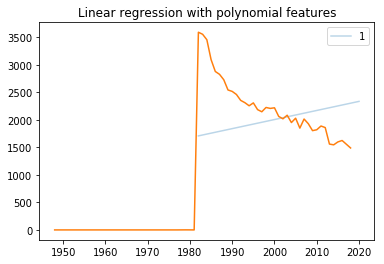

In [22]:
#predicting accident count for the year 2019,2020 and 2021
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

degrees = [1]
lr_pred_X = [[y] for y in range(1982, 2021)]
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
    lr_pred=pipeline.predict(lr_pred_X)
    plt.plot(lr_pred_X, lr_pred, alpha=.3)
    
    print("Score for degree %d: %.3f - prediction for 2019,2020,2021 is %d %d %d" % (i, pipeline.score(X, y), lr_pred[36],lr_pred[37],lr_pred[38]))

plt.plot(X, y)
plt.title("Linear regression with polynomial features")
plt.legend(labels=degrees)

plt.show()



In [23]:
import json

data1 = [lr_pred[36], '2019-01-01']
data2 = [lr_pred[37], '2020-01-01']
data3 = [lr_pred[38], '2021-01-01']

#append predicted accident counts to the dataframe
listOfSeries = [pd.Series(['2019-01-01',lr_pred[36],0,0,0], index=df_event_acc_count.columns ) ,
                pd.Series(['2020-01-01',lr_pred[37],0,0,0], index=df_event_acc_count.columns ) ,
                pd.Series(['2021-01-01',lr_pred[38],0,0,0], index=df_event_acc_count.columns ) ]

df_event_acc_count = df_event_acc_count.append(listOfSeries,ignore_index=True)
df_event_acc_count['Injuries'] = df_event_acc_count['Injuries'].astype(int)
 
#extract year from event date
df_event_acc_count['Year'] = df_event_acc_count['EventDate'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
print(df_event_acc_count.tail())
df_event_acc_count.to_csv('./aviation_data_event_count.csv', index=False)

#conver df to json
b1 = dict(df_event_acc_count.set_index('Year').groupby(level=0).apply(lambda  x : x.to_json(orient = 'records')))

#print(b1)

with open('aviation_data_event_count.json', 'w', encoding='utf-8') as x:
    json.dump(b1, x, ensure_ascii=False, indent=4)


        EventDate  Injuries  TotalFatalInjuries  TotalSeriousInjuries  \
13348  2018-12-15         0                 0.0                   0.0   
13349  2018-12-16         0                 0.0                   0.0   
13350  2019-01-01      2303                 0.0                   0.0   
13351  2020-01-01      2320                 0.0                   0.0   
13352  2021-01-01      2336                 0.0                   0.0   

       TotalMinorInjuries  Year  
13348                 0.0  2018  
13349                 0.0  2018  
13350                 0.0  2019  
13351                 0.0  2020  
13352                 0.0  2021  


In [24]:
#load csv file
aviation_data_pre = pd.read_csv("final_aviation_data.csv",encoding = "ISO-8859-1")

In [25]:
aviation_data_pre.columns
aviation_data_pre['TotalUninjured'].replace(np.nan,0,inplace=True)
aviation_data_pre['InvestigationType'].replace(np.nan,0,inplace=True)

aviation_data_pre.isnull().sum()

EventId               0
InvestigationType     0
AccidentNumber        0
Location              0
Country               0
Latitude              0
Longitude             0
AirportCode           0
AirportName           0
InjurySeverity        0
AircraftDamage        0
AircraftCategory      0
Make                  0
Model                 0
AmateurBuilt          0
NumberofEngines       0
EngineType            0
FARDescription        0
Schedule              0
PurposeofFlight       0
AirCarrier            0
TotalFatalInjuries    0
TotalUninjured        0
WeatherCondition      0
BroadPhaseofFlight    0
Year                  0
Month                 0
Injuries              0
index                 0
dtype: int64

In [26]:
#dropping unnecessary methods for clustering
aviation_data_pre.drop(['EventId', 'AccidentNumber','Location','AirportCode','AirportName','Make','Model','AirCarrier','index'], axis=1, inplace=True)

In [27]:
#converting categorical values in 0 and 1 using get_dummies
aviation_data = pd.get_dummies(aviation_data_pre, columns=['InvestigationType','Country','InjurySeverity','AircraftDamage','AircraftCategory','AmateurBuilt','EngineType','FARDescription','Schedule','PurposeofFlight','WeatherCondition','BroadPhaseofFlight','Year','Month'],prefix = ['InvestigationType','Country','InjurySeverity','AircraftDamage','AircraftCategory','AmateurBuilt','EngineType','FARDescription','Schedule','PurposeofFlight','WeatherCondition','BroadPhaseofFlight','Year','Month'])

In [28]:
aviation_data.head()
#aviation_data.shape

,Latitude,Longitude,NumberofEngines,TotalFatalInjuries,TotalUninjured,Injuries,InvestigationType_0,InvestigationType_Accident,InvestigationType_Incident,Country_Afghanistan,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,45.583611,-115.681667,1.0,0.0,1.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,34.970000,-106.000000,1.0,0.0,1.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26.925278,-82.001111,1.0,0.0,0.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,41.451667,-87.004444,1.0,1.0,0.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,43.330278,-88.326111,1.0,0.0,1.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
#normalizing all the numerical values
train_norm = aviation_data[aviation_data.columns[0:6]]

std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
normalized_data = aviation_data.update(training_norm_col)


In [30]:
#implementing K-means algorithm
kmeans = KMeans(n_clusters=11, random_state=0).fit(aviation_data)

In [31]:
labels = kmeans.labels_

In [32]:
# attching all the labels for each row in dataframe
array = np.array(labels)
aviation_data_pre['labels'] = array
array

array([ 6,  7,  7, ..., 10,  1,  1])

In [33]:
aviation_data_pre.head()

,InvestigationType,Country,Latitude,Longitude,InjurySeverity,AircraftDamage,AircraftCategory,AmateurBuilt,NumberofEngines,EngineType,...,Schedule,PurposeofFlight,TotalFatalInjuries,TotalUninjured,WeatherCondition,BroadPhaseofFlight,Year,Month,Injuries,labels
0,Accident,United States,45.583611,-115.681667,Non-Fatal,Substantial,Airplane,No,1.0,Reciprocating,...,UNK,Positioning,0.0,1.0,UNK,UNKOWN,2018,12,0.0,6
1,Accident,United States,34.970000,-106.000000,Non-Fatal,Substantial,Airplane,No,1.0,Reciprocating,...,UNK,Personal,0.0,1.0,VMC,UNKOWN,2018,12,0.0,7
2,Accident,United States,26.925278,-82.001111,Non-Fatal,Substantial,Airplane,No,1.0,Reciprocating,...,UNK,Personal,0.0,0.0,VMC,APPROACH,2018,12,1.0,7
3,Accident,United States,41.451667,-87.004444,Fatal(1),Destroyed,Airplane,No,1.0,Reciprocating,...,UNK,Personal,1.0,0.0,VMC,TAKEOFF,2018,12,1.0,7
4,Accident,United States,43.330278,-88.326111,Non-Fatal,Substantial,Airplane,No,1.0,Reciprocating,...,UNK,Personal,0.0,1.0,VMC,UNKOWN,2018,12,0.0,7


In [34]:
#sum of injuries for unique countries
sum_injuries = aviation_data_pre.groupby('Country')['Injuries'].sum()
sum_injuries_df = pd.DataFrame(sum_injuries)
sum_injuries_df

,Injuries
Country,
Afghanistan,139.0
Algeria,112.0
American Samoa,41.0
Angola,29.0
Anguilla,0.0
Antarctica,4.0
Antigua And Barbuda,0.0
Argentina,296.0
Aruba,1.0


In [35]:
#sum of fatalities for unique countries
sum_fatalities = aviation_data_pre.groupby('Country')['TotalFatalInjuries'].sum()
sum_fatalities_df = pd.DataFrame(sum_fatalities)
sum_fatalities_df

,TotalFatalInjuries
Country,
Afghanistan,128.0
Algeria,111.0
American Samoa,6.0
Angola,27.0
Anguilla,0.0
Antarctica,0.0
Antigua And Barbuda,0.0
Argentina,238.0
Aruba,0.0


In [36]:
#sum of uninjuries for unique countries
sum_uninjuries = aviation_data_pre.groupby('Country')['TotalUninjured'].sum()
sum_uninjuries_df = pd.DataFrame(sum_uninjuries)
sum_uninjuries_df

,TotalUninjured
Country,
Afghanistan,211.0
Algeria,0.0
American Samoa,184.0
Angola,102.0
Anguilla,1.0
Antarctica,10.0
Antigua And Barbuda,176.0
Argentina,3628.0
Aruba,159.0


In [37]:
max_occ_labels = aviation_data_pre.groupby(['Country','labels']).size().groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='labels')

In [38]:
max_occ_labels

,Country,labels
0,Afghanistan,2
1,Algeria,3
2,American Samoa,3
3,Angola,3
4,Anguilla,9
5,Antarctica,2
6,Antigua And Barbuda,4
7,Argentina,3
8,Aruba,3
9,Australia,3


In [39]:
dfs = [sum_injuries_df, sum_fatalities_df, sum_uninjuries_df, max_occ_labels]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)

cluster_df = df_final.to_json(orient = "records")

with open('cluster_data.json', 'w', encoding='utf-8') as y:
    json.dump(cluster_df, y, ensure_ascii=False, indent=4)
#print(cluster_df)

In [40]:
df_final.to_csv('./cluster_data.csv',index=False)